In [2]:
#import the needed modules
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from lane_finding_function import *
%matplotlib inline

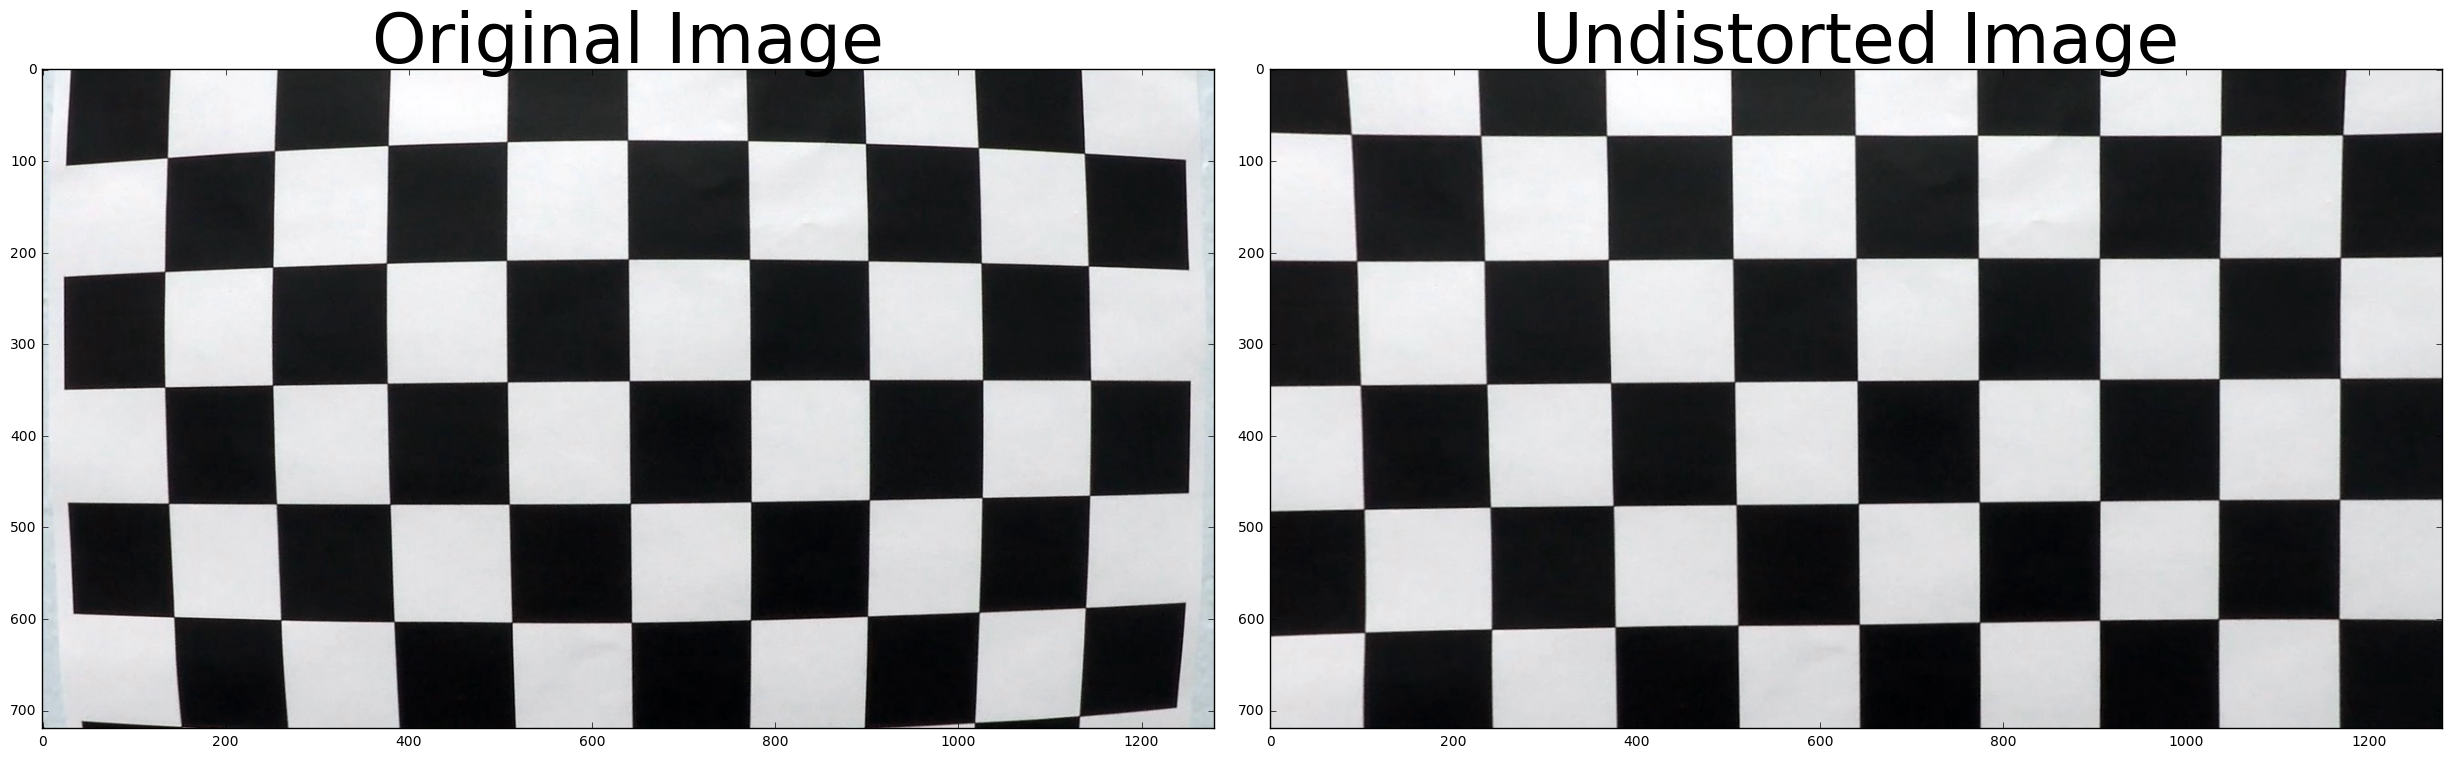

In [204]:
#plot the original image and undistorted image of a cheese board image
img_name = 'camera_cal/test1.jpg'
undistorted = cal_undistort(img_name)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(cv2.imread(img_name))
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#plt.savefig('output_images/cheeseboard.png')

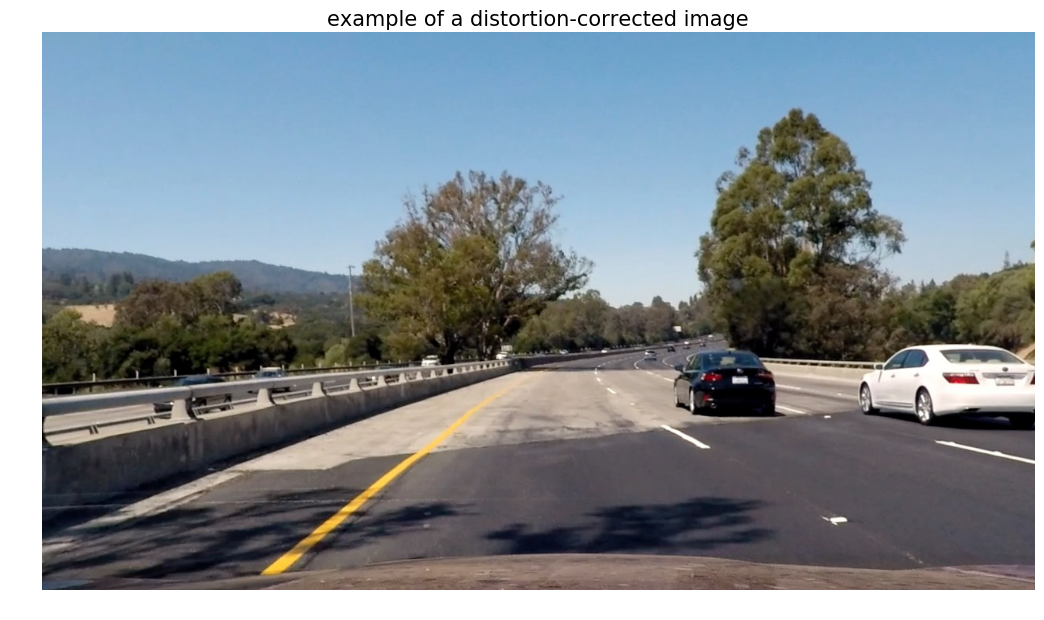

In [205]:
#plot the original image and undistorted image of a road image
#load the saved camera matrix and distortion coefficients
dist_pickle = pickle.load( open( "temp/cal_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
#conduct the undistortion
img_name = 'test_images/test4.jpg'
img = cv2.imread(img_name)
undistorted = cv2.undistort(img, mtx, dist, None, mtx)
#plot it
plt.figure(figsize=(12.8,7.2))
plt.imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('example of a distortion-corrected image', fontsize=15)
#plt.savefig('output_images/distortion_corrected.png')

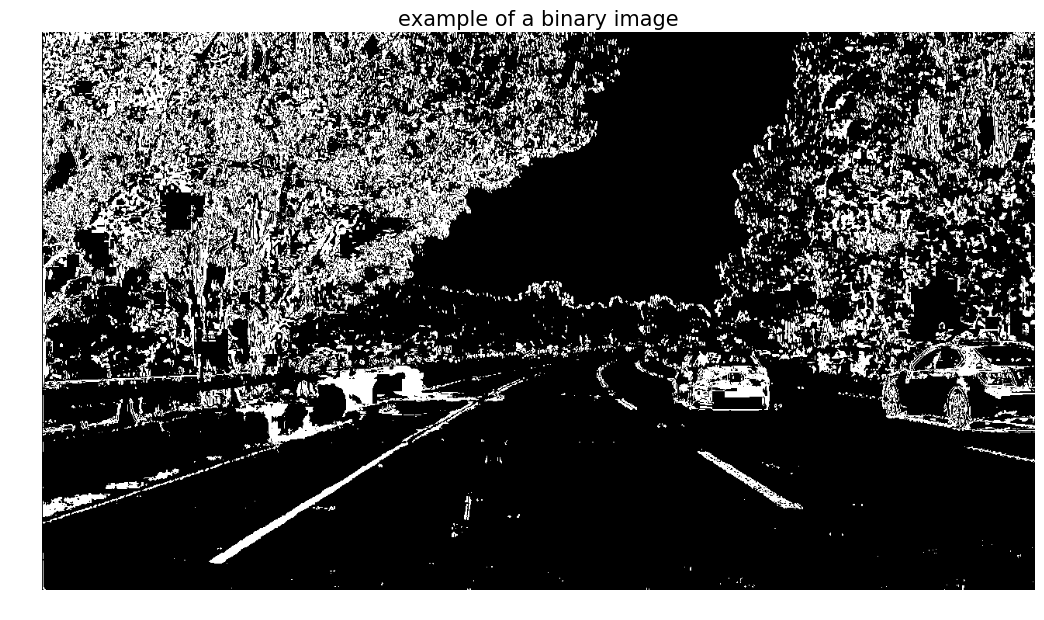

In [206]:
#Test the bianry image produce pipline
img_name = 'test_images/test5.jpg'
img = cv2.imread(img_name)
binary_img = image_process(img, (170, 255), (20, 100))
plt.figure(figsize=(12.8,7.2))
plt.imshow(binary_img, cmap='gray')
plt.axis('off')
plt.title('example of a binary image', fontsize=15)
#plt.savefig('output_images/binary_image.png')

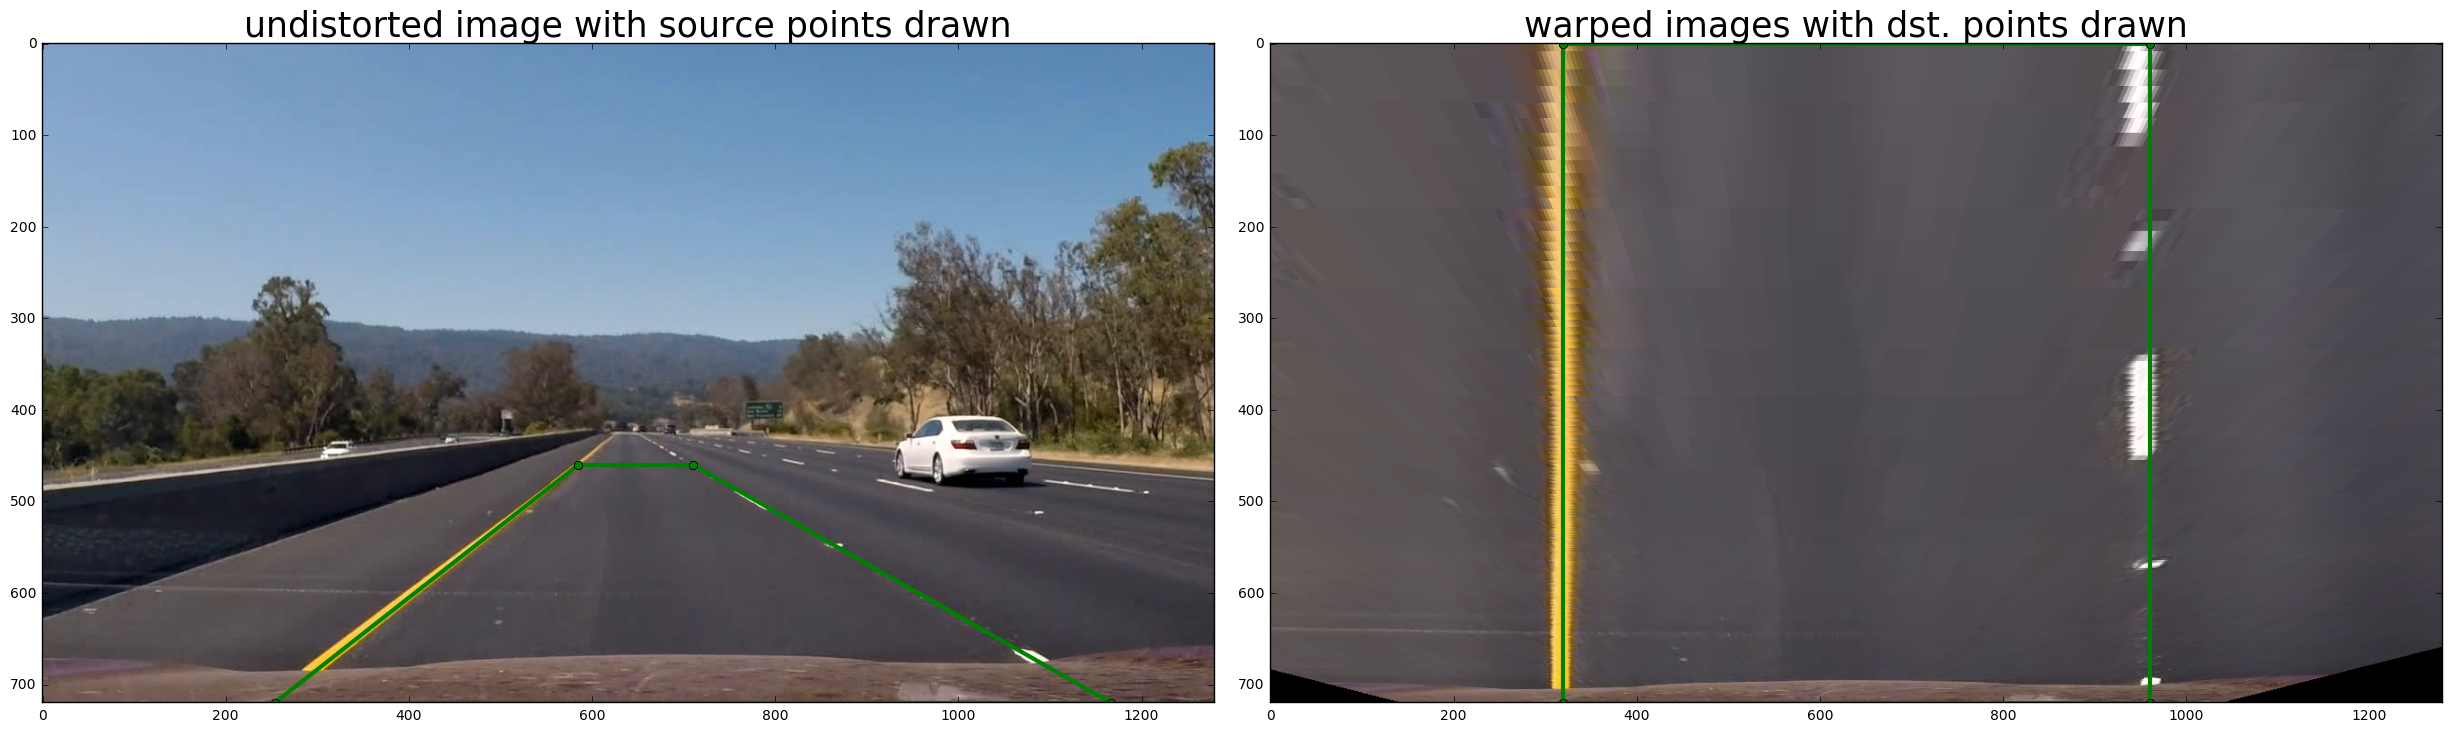

In [207]:
#perspective transform example
#extract a fram frame from the project video and save it
img_name = 'test_images/from_video.jpg'
clip1 = VideoFileClip("project_video.mp4")
clip1.save_frame(img_name, t=16, withmask=True)
#prepare the image, and src and dst points
img = cv2.imread(img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#call the perspective transform function
src,dst,warped_img = pers_trans(img)
#plot the image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.plot([src[0][0],src[1][0]], [src[0][1],src[1][1]], 'go-', linewidth=3)
ax1.plot([src[1][0],src[2][0]], [src[1][1],src[2][1]], 'go-', linewidth=3)
ax1.plot([src[2][0],src[3][0]], [src[2][1],src[3][1]], 'go-', linewidth=3)
ax1.plot([src[3][0],src[0][0]], [src[3][1],src[0][1]], 'go-', linewidth=3)
ax1.imshow(img)
ax1.set_title('undistorted image with source points drawn', fontsize=25)


ax2.plot([dst[0][0],dst[1][0]], [dst[0][1],dst[1][1]], 'go-', linewidth=3)
ax2.plot([dst[1][0],dst[2][0]], [dst[1][1],dst[2][1]], 'go-', linewidth=3)
ax2.plot([dst[2][0],dst[3][0]], [dst[2][1],dst[3][1]], 'go-', linewidth=3)
ax2.plot([dst[3][0],dst[0][0]], [dst[3][1],dst[0][1]], 'go-', linewidth=3)
ax2.imshow(warped_img)
ax2.set_title('warped images with dst. points drawn', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#plt.savefig('output_images/perspective_transform.png')

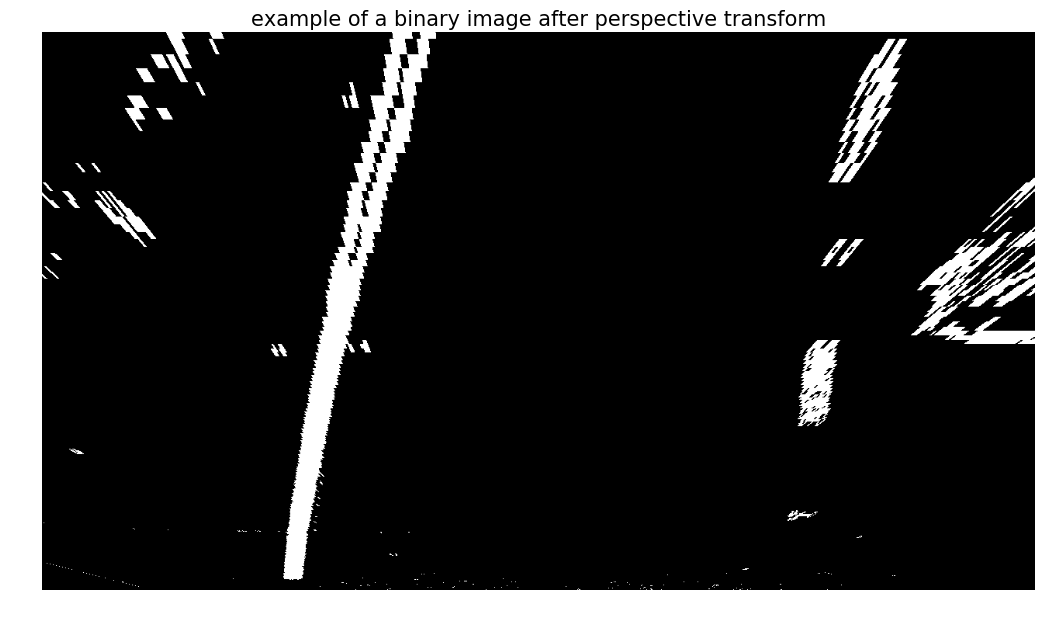

In [208]:
#perspective transform of a binary images

#prepare the image, and src and dst points
img_name = 'test_images/test6.jpg'
img = cv2.imread(img_name)
binary_img = image_process(img, (170, 255), (20, 100))

#call the perspective transform function
src,dst,warped_img = pers_trans(binary_img)
#plot the image
plt.figure(figsize=(12.8,7.2))
plt.imshow(warped_img, cmap='gray')
plt.axis('off')
plt.title('example of a binary image after perspective transform', fontsize=15)
#plt.savefig('output_images/binary_image_per_trans.png')

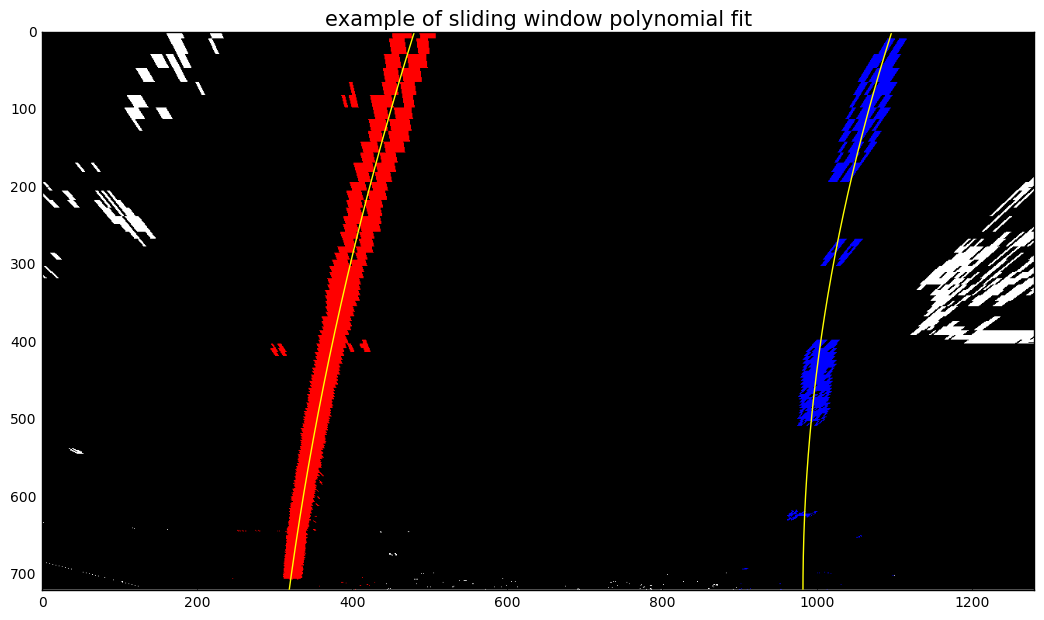

In [3]:
# ESliding Windows and Fit a Polynomial
img_name = 'test_images/test6.jpg'
img = cv2.imread(img_name)
binary_img = image_process(img, (170, 255), (20, 100))
src,dst,binary_warped = pers_trans(binary_img)
left_lane_inds,right_lane_inds,left_fit, right_fit = sliding_window_fit(binary_warped)
# Generate x and y values for plotting
fity = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
fit_leftx = left_fit[0]*fity**2 + left_fit[1]*fity + left_fit[2]
fit_rightx = right_fit[0]*fity**2 + right_fit[1]*fity + right_fit[2]

out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.figure(figsize=(12.8,7.2))
plt.imshow(out_img)
plt.plot(fit_leftx, fity, color='yellow')
plt.plot(fit_rightx, fity, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.title('example of sliding window polynomial fit', fontsize=15)
#plt.savefig('output_images/slid_win_fit.png')